<a href="https://colab.research.google.com/github/Divyanshu-ISM/Time-Series-Forecasting-/blob/main/Unit_Root_Tests_DF_and_ADF_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Lets write a function that generates synthetic AR Time Series Data

In [16]:
def generate_ar_process(lags, coefs, length):
    
    #cast coefs to np array
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
        
        #get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

In [40]:
np.random.normal()

0.05237827213389723

In [51]:
# Lags = 2 ; L = 10
# coefs = np.array([0.2,0.3])
# S = [np.random.normal() for i in range(Lags)]

# print(S)

# for _ in range(L):
#   prev_vals = S[-Lags:][::-1]
#   print(prev_vals)
      

#   new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()

#   print(new_val)

#   S.append(new_val)

# print(np.array(S))

## Example of Generating AR data

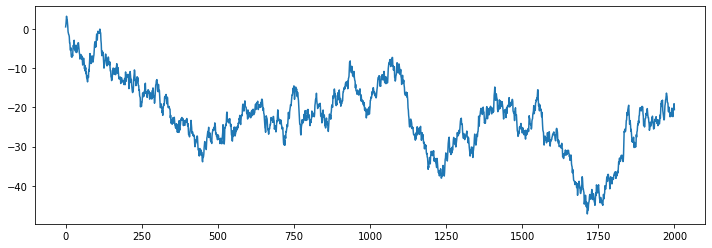

In [11]:
yt = pd.Series(generate_ar_process(1,1, 2000))

yt.plot(figsize=(12,4))

### Function that returns the ADF test results

In [17]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


def perform_adf_test_withResult(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

    if result[1] < 0.05:
      print('Stationary')
    else:
      print('Non-Stationary')

### Understanding the logic on how to generate synthetic AR(p) models

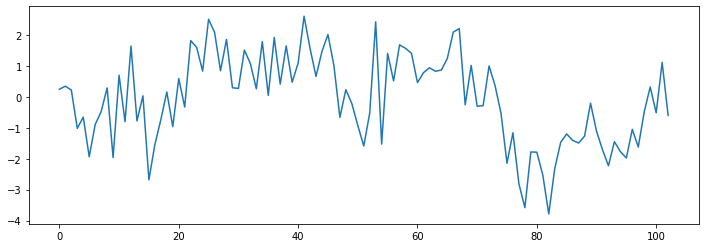

In [25]:
# df = pd.DataFrame(np.random.normal(size=200), columns = ['At'])
# df['A(t-1)'] = df['At'].shift(1)

# phi=1
# df['Phi*A(t-1)'] = df['A(t-1)']*phi

# df['Vt'] = df['Phi*A(t-1)'] + np.random.normal(size=200)

# df['Vt'].plot(figsize=(12,4))


#AR(2) Model

# Logic : The initial set of values are randomly picked and then the next values in the series are created using the last values. 

a0 = 0.25 ; a1 = 0.35

phi = [0.2,0.5]

series = [0.25, 0.35, phi[0]*0.25 + phi[1]*0.35]


for _ in range(100):

  a_next = series[-1]*phi[0] + series[-2]*phi[1] + np.random.normal()

  series.append(a_next)

At = pd.Series(series)

At.plot(figsize=(12,4))

### Critical value (alpha) = 0.05

> p < 0.05  => H0 is rejected

> p > 0.05 => H0 rejection fails

## AR(1) Process (Stationary)

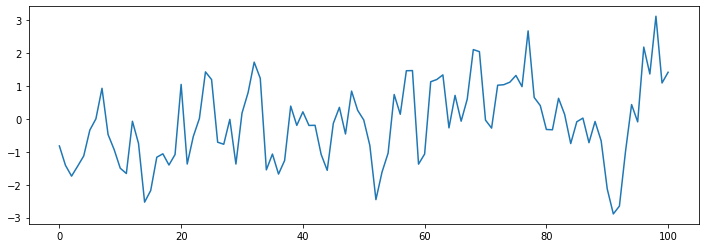

In [13]:
AR_1_stationary = pd.Series(generate_ar_process(1,[0.5], 100))

AR_1_stationary.plot(figsize=(12,4))

##### Visually it looks stationary

In [14]:
perform_adf_test(AR_1_stationary)

ADF Statistic: -4.973156
p-value: 0.000025


#### Hence p is lower than 0.05 : Strong evidence to Reject the H0 and hence H0 means T.S is Non stationary : which is rejected : 

> Hence, TS is stationary. Verified by ADF Test.

## AR(1) Non Stationary Process. 

> Let's pass a Unit Root as a coeff.

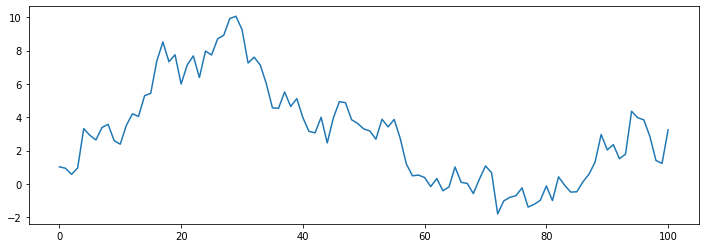

In [15]:
AR_1_Unstationary = pd.Series(generate_ar_process(1,[1], 100))

AR_1_Unstationary.plot(figsize=(12,4))

#### Visually looks Non-Stationary. 

### Lets perform ADF Test. 

> Expected Results -

H0 : Unit Root : Non Stationary

H1 : No Unit Root : Stationary

H0 shouldnt be rejected and hence p value must be higher than 0.5

In [16]:
perform_adf_test(AR_1_Unstationary)

ADF Statistic: -1.705049
p-value: 0.428513


# AR(2) Stationary Process

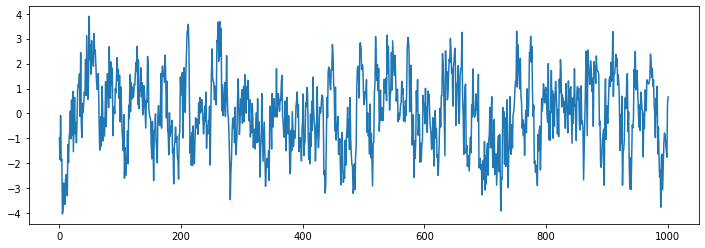

In [18]:
AR_2_stationary = pd.Series(generate_ar_process(2,[0.5, 0.3], 1000))

AR_2_stationary.plot(figsize=(12,4))

In [19]:
perform_adf_test(AR_2_stationary)

ADF Statistic: -9.268039
p-value: 0.000000


## AR(2) Unstationary process


Hint : Coefficients Sum if 1 or greater than 1 suggests Unit Root problem

H0 : Unit Root : Non-Stationary (Should be accepted)

Hence p value must be High

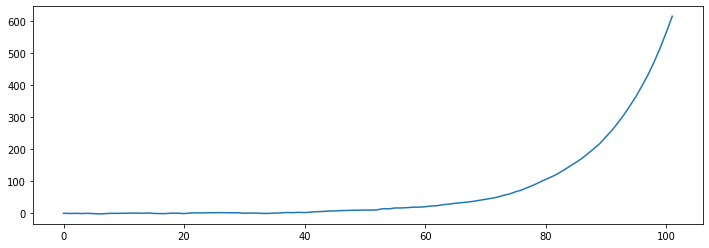

In [23]:
AR_2_Unstationary = pd.Series(generate_ar_process(2,[1, 0.1], 100))

AR_2_Unstationary.plot(figsize=(12,4))

In [24]:
perform_adf_test(AR_2_Unstationary)

ADF Statistic: 6.114611
p-value: 1.000000


## More AR(2) Non-Stationary Examples

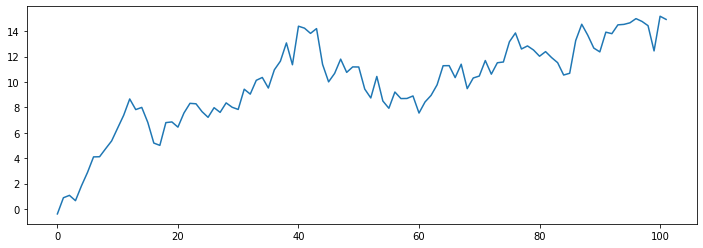

In [27]:
S1 = pd.Series(generate_ar_process(2,[0.9, 0.1], 100))


S1.plot(figsize=(12,4))

In [28]:
perform_adf_test(S1)

ADF Statistic: -2.689329
p-value: 0.075903


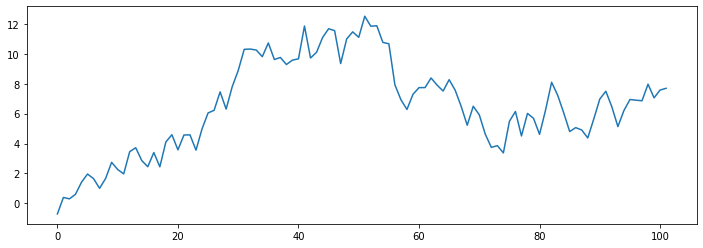

In [29]:
S2 = pd.Series(generate_ar_process(2,[0.8, 0.2], 100))


S2.plot(figsize=(12,4))

In [30]:
perform_adf_test(S2)

ADF Statistic: -2.480758
p-value: 0.120227


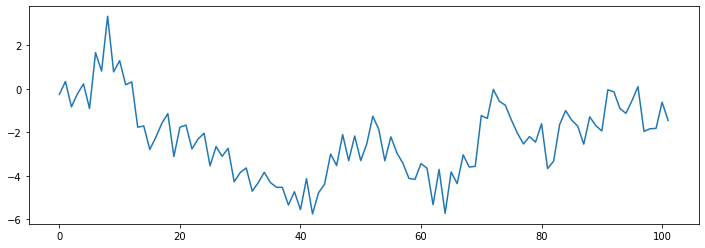

In [31]:
S3 = pd.Series(generate_ar_process(2,[0.5, 0.5], 100))


S3.plot(figsize=(12,4))

In [32]:
perform_adf_test(S3)

ADF Statistic: -2.164262
p-value: 0.219471


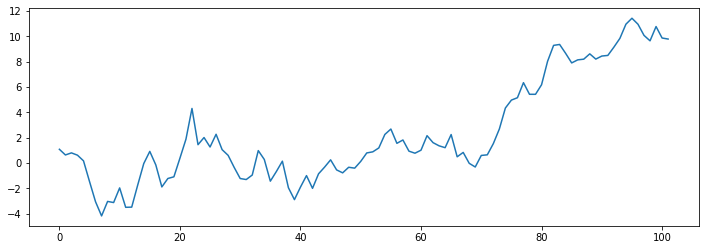

In [33]:
S4 = pd.Series(generate_ar_process(2,[1,0], 100))


S4.plot(figsize=(12,4))

In [34]:
perform_adf_test(S4)

ADF Statistic: -0.530278
p-value: 0.885971


In [36]:
perform_adf_test_withResult(S4)

ADF Statistic: -0.530278
p-value: 0.885971
Non-Stationary
